In [4]:
import cv2  # Import OpenCV for computer vision tasks
import numpy as np  # Import NumPy for numerical operations
import time  # Import time module for FPS calculation

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Check if the webcam is accessible
if not cap.isOpened():
    raise RuntimeError("Could not access the webcam.")  # Raise an error if no webcam is found

# Define HSV range for detecting blue color
lower_blue = np.array([100, 50, 50])   # Lower bound of blue in HSV color space
upper_blue = np.array([140, 255, 255]) # Upper bound of blue in HSV color space

# Initialize a variable to store the previous time for FPS calculation
prev_time = 0

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame. Exiting...")
        break  # Exit the loop if frame capture fails

    # Convert the frame from BGR to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Create a mask to filter out only the blue color
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Apply the mask to keep only blue parts in the frame
    result = cv2.bitwise_and(frame, frame, mask=mask)

    # Find contours (boundaries) of detected blue objects
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through each detected contour
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Ignore small noisy areas
            # Get bounding box (x, y, width, height) around the blue object
            x, y, w, h = cv2.boundingRect(contour)
            # Draw a yellow rectangle around the detected blue object
            cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 255), 2)  

    # Calculate Frames Per Second (FPS) for performance monitoring
    curr_time = time.time()
    fps = 1 / (curr_time - prev_time)  # FPS formula
    prev_time = curr_time  # Update previous time

    # Create a semi-transparent overlay for the HUD (Heads-Up Display)
    overlay = result.copy()
    cv2.rectangle(overlay, (0, 0), (frame.shape[1], 50), (0, 0, 0), -1)  # Black bar at the top
    result = cv2.addWeighted(overlay, 0.6, result, 0.4, 0)  # Blend overlay with frame

    # Display FPS on the top left corner of the screen
    cv2.putText(result, f"FPS: {int(fps)}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Show exit instruction on the top right corner
    cv2.putText(result, "[Q] Quit", (frame.shape[1] - 120, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Show the processed video with only blue color highlighted
    cv2.imshow("Blue Color Detector", result)

    # Check if the 'q' key is pressed to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [5]:
# We are detecting all the blue colors 

In [7]:
import cv2

# Load the image from the specified path
image3 = cv2.imread('Blue_Color_Detection.png',1)

# Check if the image was loaded successfully
if image3 is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Display the image in a window
    cv2.imshow('Screenshot', image3)
    
    # Wait for a key press and close the window when any key is pressed
    cv2.waitKey(0)
    cv2.destroyAllWindows()

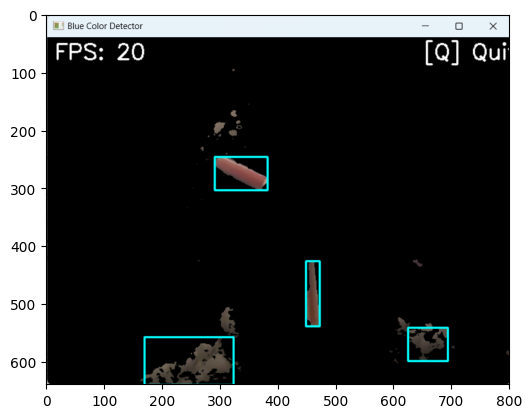

In [9]:
from matplotlib import pyplot as plt 
plt.imshow(image3)